In [9]:
import pandas as pd
import math
import seaborn as sns
import numpy as np
import time
from datetime import datetime
from pandas.api.types import CategoricalDtype
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:

data = pd.read_csv('ks-projects-201801.csv', encoding = "ISO-8859-1")


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


None

In [4]:
data.nunique()

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
usd pledged,3797,0.010027
name,4,0.000011
usd_goal_real,0,0.000000
usd_pledged_real,0,0.000000
country,0,0.000000
backers,0,0.000000
state,0,0.000000
pledged,0,0.000000
launched,0,0.000000
goal,0,0.000000


### Cleaning data 

In [6]:
data = data.drop(['ID', 'name'], axis = 1, errors = 'ignore') 
data = data.rename(index=str, columns={"state ": "state", "country ": "country"})

In [7]:
data["state"] = data["state"].astype('category').cat.codes
data["country"] = data["country"].astype('category').cat.codes
data["currency"] = data["currency"].astype('category').cat.codes
data["main_category"] = data["main_category"].astype('category').cat.codes
data["category"] = data["category"].astype('category').cat.codes


In [10]:
#Conver datatipes to number 
data.launched = data.launched.map(lambda x: time.mktime(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timetuple()))
data.deadline = data.deadline.map(lambda x: time.mktime(datetime.strptime(x, "%Y-%m-%d").timetuple()))

In [11]:
#Solve the problem with missing values 
#Fill nil to mean
data.fillna(data.mean(), inplace=True)

#Fill median
# data.fillna(data.median(), inplace=True)



In [14]:
data

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,108,12,5,1.444342e+09,1000.0,1.439288e+09,0.00,1,0,9,0.00,0.00,1533.95
1,93,6,13,1.509491e+09,30000.0,1.504320e+09,2421.00,1,15,22,100.00,2421.00,30000.00
2,93,6,13,1.361833e+09,45000.0,1.357946e+09,220.00,1,3,22,220.00,220.00,45000.00
3,90,10,13,1.334527e+09,5000.0,1.331951e+09,1.00,1,1,22,1.00,1.00,5000.00
4,55,6,13,1.440799e+09,19500.0,1.435992e+09,1283.00,0,14,22,1283.00,1283.00,19500.00
5,123,7,13,1.459462e+09,50000.0,1.456490e+09,52375.00,3,224,22,52375.00,52375.00,50000.00
6,58,7,13,1.419116e+09,1000.0,1.417455e+09,1205.00,3,16,22,1205.00,1205.00,1000.00
7,41,7,13,1.458169e+09,25000.0,1.454354e+09,453.00,1,40,22,453.00,453.00,25000.00
8,113,4,13,1.401314e+09,125000.0,1.398356e+09,8233.00,0,58,22,8233.00,8233.00,125000.00
9,39,6,13,1.407622e+09,65000.0,1.405109e+09,6240.57,0,43,22,6240.57,6240.57,65000.00


### Build DecisionTreeClassifier model 

In [17]:
# Create label data and feratures data 
label = data.state
featurse = data.drop(['state', 'Id'], axis = 1, errors = 'ignore')

In [18]:
 # Try to find best result for more depths of tree
depths = range(1,20)
acc = []
RMSE = []
count = 0
for depth in depths:
    dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=depth)
    predicted = cross_val_predict(dt, featurse, label, cv=4)
    acc.append(metrics.accuracy_score(label, predicted))
    RMSE.append(np.sqrt(metrics.mean_squared_error(label, predicted)))
    count += 1
    print("Iteration: " + str(count))
    

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19


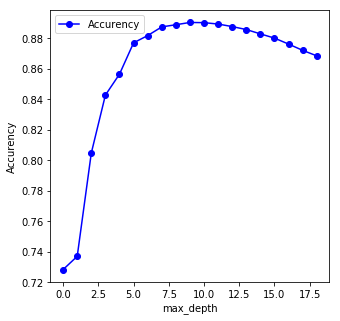

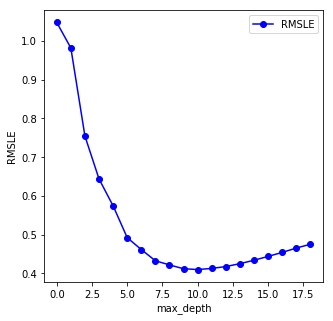

In [19]:
plt.figure(figsize=(5,5))
plt.plot(acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('Accurency')
plt.legend(['Accurency'])


plt.figure(figsize=(5,5))
plt.plot(RMSLE,'ob-')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(['RMSE'])

In [22]:
#Best model
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8)
predicted = cross_val_predict(dt, featurse, label, cv=4)

print("[DecisionTree] Accurency of the best configuration: " + str(metrics.accuracy_score(label, predicted)))
print("[DecisionTree] RMSE of the best configuration: " + str(metrics.mean_squared_error(label, predicted)))

[DecisionTree] Accurency of the best configuration: 0.8873873992832639
[DecisionTree] RMSE of the best configuration: 0.18702216494436977


### Build RandomForest model 

In [24]:
 # Try to find best result for more depths of tree
depths = range(1,20,5)
count_trees = range(1,800,200)
max_features = range(5,65,20)
acc = []
RMSE = []
for depth in depths:
    for n_est in count_trees:
        for max_f in max_features:
            rf = RandomForestClassifier(n_estimators=1000, max_features=50, max_depth=depth)
            predicted = cross_val_predict(dt, featurse, label, cv=4)
            acc.append([metrics.accuracy_score(label, predicted), depth, n_est, max_f])
            RMSE.append([np.sqrt(metrics.mean_squared_error(label, predicted)), depth, n_est, max_f])

In [25]:
acc.sort(key=lambda x: x[0], reverse=True)
print(acc[0])

RMSE.sort(key=lambda x: x[0], reverse=False)
print(RMSE[0])

[0.8874085263599896, 1, 401, 25]
[0.4321948726963089, 1, 401, 25]


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(max_depth=5, random_state=444)
predicted = cross_val_predict(model, featurse, label, cv=5)

In [30]:
print("[DecisionTree] Accurency of the best configuration: " + str(metrics.accuracy_score(label, predicted)))
print("[DecisionTree] RMSE of the best configuration: " + str(metrics.mean_squared_error(label, predicted)))

[DecisionTree] Accurency of the best configuration: 0.8895555655322307
[DecisionTree] RMSE of the best configuration: 0.1760624938929544
